In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('../data/merge-data-1.csv', sep='~')
df.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,rym rating,ratings,reviews,popularity
count,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,14363.000000,1.436300e+04,14363.000000,14363.000000,13611.000000,13611.000000,14363.000000
mean,7181.000000,0.441265,0.490766,5.232055,-13.140224,0.653206,0.084234,0.468226,0.285407,0.205916,0.421904,116.468679,2.633422e+05,3.818422,3.892785,7083.351333,131.791713,27.325698
std,4146.385293,0.183334,0.303645,3.518423,6.991007,0.475966,0.130424,0.388169,0.368540,0.181797,0.275321,30.595645,1.698226e+05,0.569525,0.105674,8853.851429,173.725571,18.446576
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,0.000000,3.650000,20.000000,1.000000,0.000000
25%,3590.500000,0.302000,0.217000,2.000000,-17.153000,0.000000,0.036400,0.044400,0.000036,0.097500,0.177000,93.063000,1.679330e+05,4.000000,3.820000,826.000000,11.000000,12.000000
50%,7181.000000,0.435000,0.484000,5.000000,-11.518000,1.000000,0.045200,0.445000,0.021800,0.130000,0.397000,114.417000,2.289320e+05,4.000000,3.870000,4033.000000,71.000000,27.000000
75%,10771.500000,0.573000,0.762000,8.000000,-7.987500,1.000000,0.070100,0.885000,0.689500,0.253000,0.643000,135.998500,3.101600e+05,4.000000,3.950000,9347.000000,176.000000,40.000000
max,14362.000000,0.967000,1.000000,11.000000,3.744000,1.000000,0.964000,0.996000,1.000000,0.994000,0.989000,238.895000,2.255786e+06,5.000000,4.410000,60837.000000,1559.000000,87.000000


<AxesSubplot:>

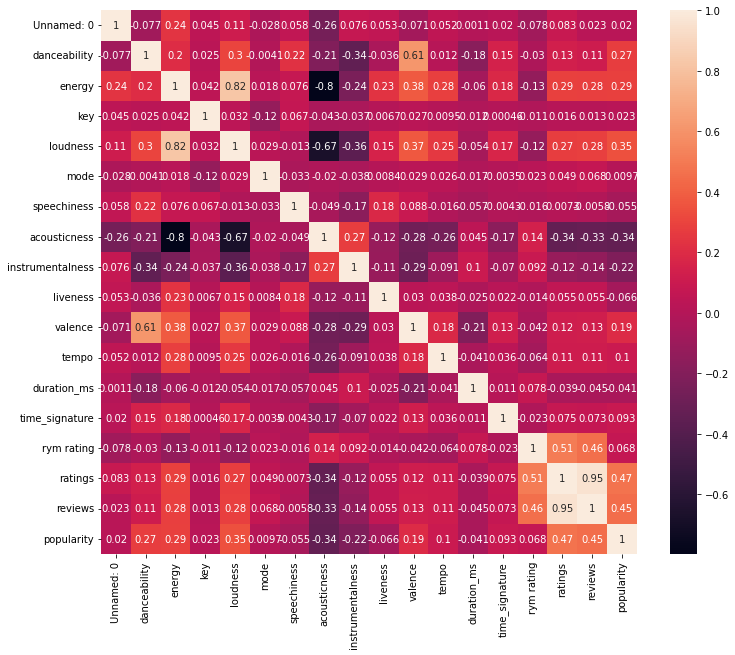

In [4]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [11]:
main_genre = {}
c = 0
for idx,row in df.iterrows():
    # c +=1
    # if c == 20:
    #     break
    genre = row['genres'].split(',')[0]
    if genre in main_genre.keys():
        main_genre[genre] += 1
    else:
        main_genre[genre] = 1

main_genre
        

{'Hard Bop': 360,
 'Post-Bop': 270,
 'Third Stream': 12,
 'Romanticism': 634,
 'Classical Period': 376,
 'Modern Classical': 448,
 'Rhythm & Blues': 25,
 'Cool Jazz': 73,
 'Avant-Garde Jazz': 88,
 'Symphony': 101,
 'Big Band': 67,
 'Bossa nova': 12,
 'Film Score': 793,
 'Vocal Jazz': 83,
 'Dixieland': 12,
 'Modal Jazz': 72,
 'Baroque Music': 874,
 'Free Jazz': 55,
 'Tango nuevo': 41,
 'Progressive Big Band': 5,
 'Show Tunes': 139,
 'Acoustic Texas Blues': 8,
 'Opera': 81,
 'Bluegrass': 12,
 'Swing': 8,
 'Jazz': 40,
 'Contemporary Folk': 103,
 'Samba': 76,
 'Delta Blues': 20,
 'Southern Soul': 121,
 'Bebop': 5,
 'Samba-jazz': 24,
 'Girl Group': 12,
 'Bolero': 6,
 'Choral': 45,
 'Merseybeat': 13,
 'Spiritual Jazz': 60,
 'Folk Rock': 152,
 'Pop Rock': 464,
 'Christmas Music': 14,
 'Deep Soul': 78,
 'Chamber Music': 96,
 'Chicago Blues': 39,
 'Film Soundtrack': 71,
 'Baroque Pop': 92,
 'Experimental Rock': 111,
 'Folk Pop': 46,
 'Nueva canción latinoamericana': 13,
 'Electric Blues': 8,
 '

<AxesSubplot:xlabel='genre'>

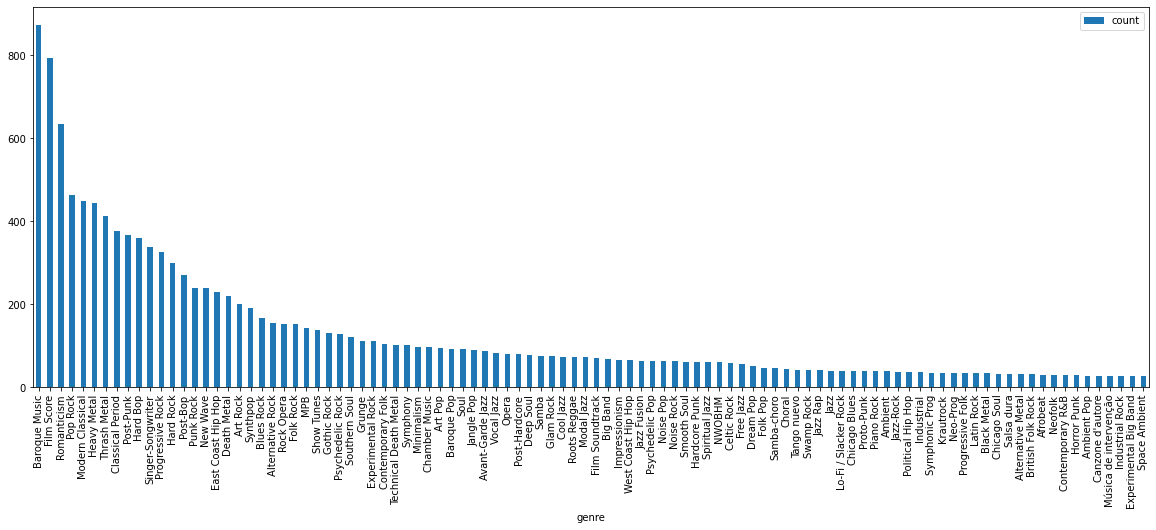

In [39]:
df_genres = pd.DataFrame.from_dict(main_genre.items())
df_genres.columns = ['genre','count']
df_genres.sort_values(by = ['count'],ascending=False,inplace=True)
df_genres_shortend= df_genres.head(100)
df_genres_shortend.plot.bar(x='genre',figsize=(20,7))
# df_genres.head(10)
# plt.plot(df, kind = 'bar')
# plt.show()


Our preliminary EDA shows there is a strong bias, on the top 20 songs from Rate Your Music's community. 

Text(0, 0.5, 'Count')

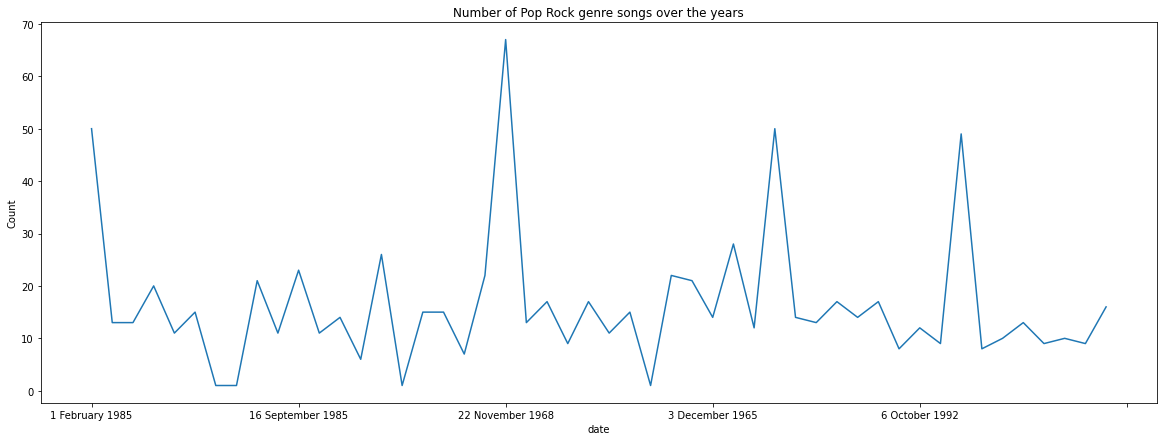

In [65]:
df_poprock = df.loc[df['genres'].str.contains( 'Pop Rock')]
ax = df_poprock.groupby(['date']).count()['key'].plot(figsize=(20,7), title = 'Number of Pop Rock Genre Songs Over the Years')
ax.set_ylabel('Count')

<AxesSubplot:xlabel='rym rating', ylabel='popularity'>

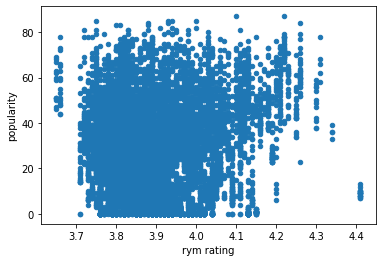

In [70]:
df.plot.scatter(x='rym rating',y='popularity')